In [155]:
!pip install wbdata
import wbdata

In [156]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 
import cufflinks as cf
cf.go_offline()

In [157]:
import wbdata

In [178]:
SOURCE = 2 
indicators = wbdata.get_indicator(source=SOURCE)
#indicators

In [159]:
# Give variable for clarity
indicators = {"NY.GDP.PCAP.CD":"GDP per capita",
              "NY.GDP.PCAP.KD.ZG": "GDP per capita growth",
              "SP.DYN.TFRT.IN":"Total Fertility Rate",
              "SP.POP.GROW":"Population Growth Rate",
              "SP.DYN.AMRT.MA":"Male Mortality",
              "SP.DYN.AMRT.FE":"Female Mortality",
              "SP.POP.1564.FE.ZS":"% Adult Female",
              "SP.POP.TOTL.FE.ZS":"% Female", 
              "SP.POP.TOTL" : "Total Population",
              "SM.POP.NETM" : "Net migration",
              "SP.URB.TOTL.IN.ZS": "Urban Population (% of total)"}

us = wbdata.get_dataframe(indicators, country="USA")
jpn = wbdata.get_dataframe(indicators, country="JPN")
ind = wbdata.get_dataframe(indicators, country="IND")

# Date index is of type string; change to integers
us.index = us.index.astype('int')
jpn.index = jpn.index.astype('int')
ind.index = ind.index.astype('int')

In [160]:
#A function that returns a pandas DataFrame indexed by Region or Country and Year, with 
#columns giving counts of people in different age-sex groups. 
def population_df(location = "USA"):
    labels = {"SP.POP." + "80UP" + ".MA": "Male:" + "80-UP","SP.POP." + "80UP" + ".FE": "Female:" + "80-UP"}
    labels.update({"SP.POP." + f"{i:02d}" + f"{i+4:02d}" + ".MA": "Male:" + f"{i:02d}" + "-" + f"{i+4:02d}" for i in range(0, 80, 5)})
    labels.update({"SP.POP." + f"{i:02d}" + f"{i+4:02d}" + ".FE": "Female:" + f"{i:02d}" + "-" + f"{i+4:02d}" for i in range(0, 80, 5)})
    df = wbdata.get_dataframe(labels, country = location) 
    df.reset_index(inplace = True)
    df["Region"] = location
    df["date"] = df["date"].astype(int)
    df.set_index(["Region", "date"], inplace = True)
    return df

population_df("USA")

Male:80-UP  Female:80-UP  Male:00-04  Male:05-09  Male:10-14  \
Region date                                                                 
USA    2021   5141691.0     7481166.0   9649499.0  10350050.0  10981126.0   
       2020   5034000.0     7322597.0   9852037.0  10415215.0  11134524.0   
       2019   4920646.0     7191218.0   9966405.0  10406055.0  11106026.0   
       2018   4867015.0     7157291.0  10075446.0  10491691.0  11057812.0   
       2017   4828475.0     7142701.0  10132520.0  10609795.0  10951980.0   
...                 ...           ...         ...         ...         ...   
       1964   1160164.0     1842892.0  10238054.0  10229317.0   9361755.0   
       1963   1128657.0     1769622.0  10326196.0  10102636.0   9027461.0   
       1962   1101736.0     1705335.0  10374649.0   9913431.0   8888062.0   
       1961   1072528.0     1640941.0  10370108.0   9880207.0   8627853.0   
       1960   1041819.0     1574181.0  10294500.0   9698745.0   8334413.0   

             Male:15-19  Male:20-24  Male:25-29  Male:30-34  Male:35-39  ...  \
Region date                                                              ...   
USA    2021  11093229.0  11051728.0  11457880.0  11655269.0  11205436.0  ...   
       2020  11074742.0  11019123.0  11624147.0  11558689.0  11181191.0  ...   
       2019  10987004.0  10951050.0  11663144.0  11361102.0  11050733.0  ...   
       2018  10944241.0  11028203.0  11698726.0  11234670.0  10938202.0  ...   
       2017  10901962.0  11158423.0  11634024.0  11123129.0  10770172.0  ...   
...                 ...         ...         ...         ...         ...  ...   
       1964   8052724.0   6268166.0   5553623.0   6286435.0   6174451.0  ...   
       1963   7805866.0   6007957.0   5533402.0   6463115.0   6117296.0  ...   
       1962   7456087.0   5699131.0   5614626.0   6494632.0   6170912.0  ...   
       1961   6940722.0   5575583.0   5677222.0   6527553.0   6049136.0  ...   
       1960   6582483.0   5480961.0   5824537.0   6415159.0   6026411.0  ...   

             Female:30-34  Female:35-39  Female:40-44  Female:45-49  \
Region date                                                           
USA    2021    11405195.0    10966698.0    10556704.0    10045368.0   
       2020    11286312.0    10952602.0    10376717.0    10278884.0   
       2019    11071806.0    10846744.0    10142512.0    10427530.0   
       2018    10938677.0    10770283.0    10022352.0    10574380.0   
       2017    10837966.0    10643766.0     9971595.0    10659578.0   
...                   ...           ...           ...           ...   
       1964     5672878.0     6089107.0     6408214.0     5627116.0   
       1963     5747618.0     6242072.0     6273024.0     5560757.0   
       1962     5797405.0     6422695.0     6036471.0     5596376.0   
       1961     5923685.0     6362025.0     5983997.0     5624908.0   
       1960     6029826.0     6343683.0     5906118.0     5622046.0   

             Female:50-54  Female:55-59  Female:60-64  Female:65-69  \
Region date                                                           
USA    2021    10556848.0    10931308.0    10784355.0     9670021.0   
       2020    10547806.0    11141839.0    10723886.0     9509351.0   
       2019    10548318.0    11163030.0    10564689.0     9015729.0   
       2018    10725051.0    11184265.0    10435807.0     8691035.0   
       2017    10929543.0    11189734.0    10241524.0     8574778.0   
...                   ...           ...           ...           ...   
       1964     5382397.0     4836839.0     3889258.0     3645486.0   
       1963     5314797.0     4672679.0     3895651.0     3556866.0   
       1962     5221363.0     4544874.0     3881892.0     3433035.0   
       1961     5050993.0     4461554.0     3834536.0     3349577.0   
       1960     4892622.0     4331325.0     3833465.0     3280254.0   

             Female:70-74  Female:75-79  
Region date                              
USA    2021     7725296.0     5438472.

In [161]:
#Growth Rate Function: Takes in initial year, final year, dataframe, indicator and year step size (eg: 20 years) 
#and outputs a list of growth rates of the indicator for the year increments  

def growth_rate(initial, final, df, indicator, step):
    start_years = np.arange(initial, final, step)
    end_years = np.arange(initial + step - 1, final + step, step)
    init_data = [df.loc[i, indicator] for i in start_years]
    fin_data = [df.loc[e, indicator] for e in end_years]
    pair = [(init_data[i], fin_data[i]) for i in range(0, len(init_data))]
    return [(((x[1] - x[0])/x[0]) * 100) for  x in pair ]

#Average Function: Takes in initial year, final year, dataframe, indicator and year step size (eg: 20 years) 
#and outputs a list of averages rates of the indicator over the year increments  
def average(initial, final, df, indicator, step):
    start_years = np.arange(initial, final, step)
    end_years = np.arange(initial + step - 1, final + step, step)
    pair = [(start_years[i], end_years[i]) for i in range(0, len(start_years))]
    lts = [[df.loc[x[1]:x[0], indicator]] for x in pair]
    return [np.average(i) for i in lts]

In [162]:
#Create new dataframe called Analysis with GDP growth, Population Growth, Average Total Fertility Rate
#Add data from US: 
data = growth_rate(1961, 2020, us, "GDP per capita", 20)
index = ["1961-1980","1981 - 2000", "2001 - 2020"]
analysis = pd.DataFrame(data, index, columns = ["US GDP growth (%)"])
analysis["US Population growth (%)"] = growth_rate(1961, 2020, us, "Total Population", 20)
analysis["US Average Fertility Rate"] = average(1961, 2020, us, "Total Fertility Rate", 20)
analysis["US Urban Population Growth Rate (%)"] = growth_rate(1961,2020, us, "Urban Population (% of total)", 20)

In [163]:
# Add data from Japan to the Analysis dataframe 
analysis["Japan GDP growth (%)"] = growth_rate(1961, 2020, jpn, "GDP per capita", 20)
analysis["Japan Population growth (%)"] = growth_rate(1961, 2020, jpn, "Total Population", 20)
analysis["Japan Average Fertility Rate"] = average(1961, 2020, jpn, "Total Fertility Rate", 20)
analysis["Japan Urban Population Growth Rate (%)"] = growth_rate(1961,2020, jpn, "Urban Population (% of total)", 20)

In [164]:
# Add data from India to the Analysis dataframe
analysis["India GDP growth (%)"] = growth_rate(1961, 2020, ind, "GDP per capita", 20)
analysis["India Population growth (%)"] = growth_rate(1961, 2020, ind, "Total Population", 20)
analysis["India Average Fertility Rate"] = average(1961, 2020, ind, "Total Fertility Rate", 20)
analysis["India Urban Population Growth Rate (%)"] = growth_rate(1961,2020, ind, "Urban Population (% of total)", 20)

In [165]:
#Data Frame with our Analysis of different indicators over the three time periods 
analysis

,US GDP growth (%),US Population growth (%),US Average Fertility Rate,US Urban Population Growth Rate (%),Japan GDP growth (%),Japan Population growth (%),Japan Average Fertility Rate,Japan Urban Population Growth Rate (%),India GDP growth (%),India Population growth (%),India Average Fertility Rate,India Urban Population Growth Rate (%)
1961-1980,310.061428,23.699582,2.394075,4.775708,1563.425042,24.190102,1.98115,18.628627,211.028846,52.695414,5.5065,28.094499
1981 - 2000,159.943347,22.964801,1.947225,6.992827,278.076116,7.803775,1.56850,3.115126,62.857010,48.643472,4.0112,18.149208
2001 - 2020,71.086547,16.328840,1.921875,4.328950,16.020333,-0.698393,1.36850,14.741843,324.621968,29.418422,2.6050,25.102085


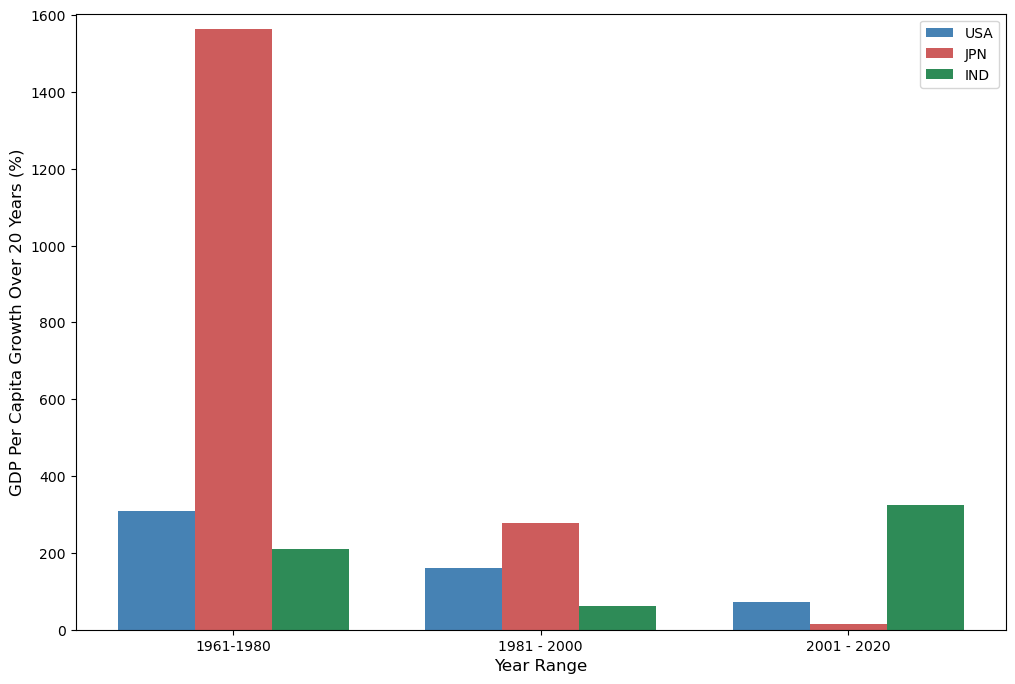

In [166]:
# Create a plot of the GDP growth over the 20 year periods for each country, US, Japan and India  

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

 
# set height of bar
USA = analysis.loc[:,"US GDP growth (%)"]
JPN = analysis.loc[:,"Japan GDP growth (%)"]
IND = analysis.loc[:,"India GDP growth (%)"]
 
# Set position of bar on X axis
br1 = np.arange(len(USA))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, USA, color ="steelblue", width = barWidth, label ='USA')
plt.bar(br2, JPN, color ="indianred", width = barWidth,
         label ='JPN')
plt.bar(br3, IND, color ='seagreen', width = barWidth, label ='IND')
 
# Adding Xticks
plt.xlabel('Year Range', fontsize = 12)
plt.ylabel('GDP Per Capita Growth Over 20 Years (%)', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(USA))],
        analysis.index )
max_y_lim = max(JPN) + 40
min_y_lim = 0
plt.ylim(min_y_lim, max_y_lim)
 
plt.legend()
plt.show()

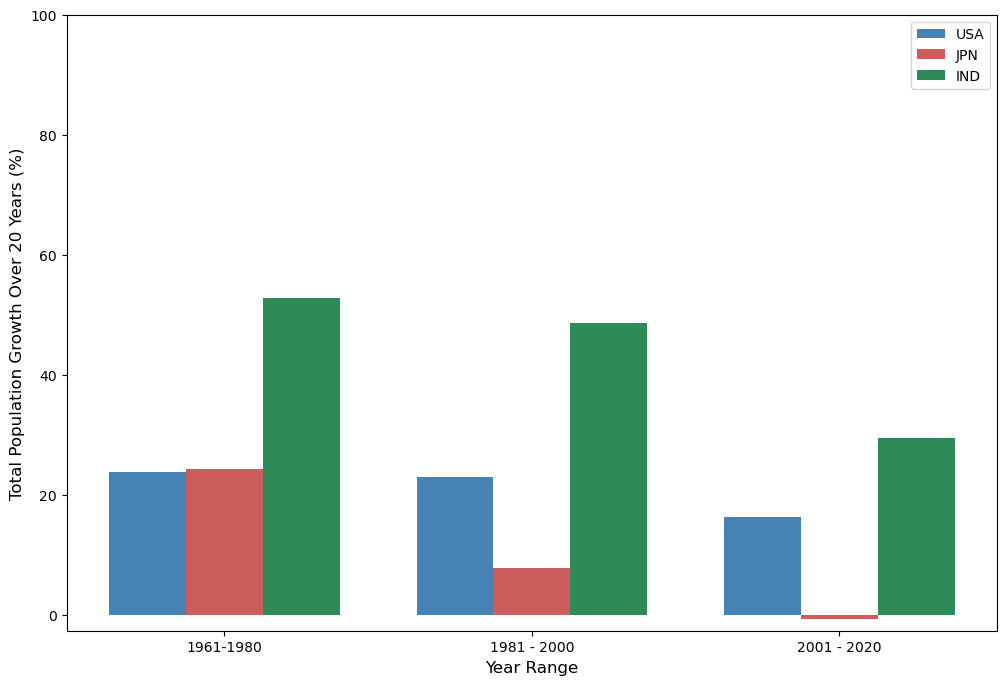

In [167]:
# Create a plot of the Population growth over the 20 year periods for each country, US, Japan and India  

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

 
# set height of bar
USA = analysis.loc[:,"US Population growth (%)"]
JPN = analysis.loc[:,"Japan Population growth (%)"]
IND = analysis.loc[:,"India Population growth (%)"]
 
# Set position of bar on X axis
br1 = np.arange(len(USA))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, USA, color ="steelblue", width = barWidth, label ='USA')
plt.bar(br2, JPN, color ="indianred", width = barWidth,
         label ='JPN')
plt.bar(br3, IND, color ='seagreen', width = barWidth, label ='IND')
 
# Adding Xticks
plt.xlabel('Year Range', fontsize = 12)
plt.ylabel('Total Population Growth Over 20 Years (%)', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(USA))],
        analysis.index )
max_y_lim = 100
min_y_lim = min(JPN) -2
plt.ylim(min_y_lim, max_y_lim)
 
plt.legend()
plt.show()

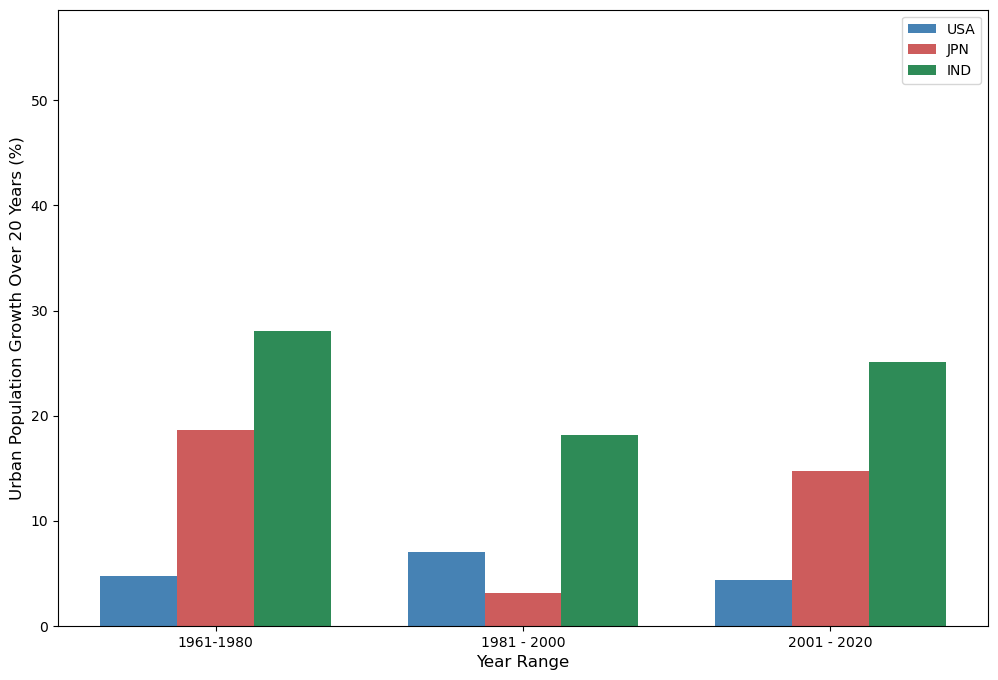

In [168]:
# Create a plot of the Urban Population growth over the 20 year periods for each country, US, Japan and India  

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

 
# set height of bar
USA = analysis.loc[:,"US Urban Population Growth Rate (%)"]
JPN = analysis.loc[:,"Japan Urban Population Growth Rate (%)"]
IND = analysis.loc[:,"India Urban Population Growth Rate (%)"]
 
# Set position of bar on X axis
br1 = np.arange(len(USA))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, USA, color ="steelblue", width = barWidth, label ='USA')
plt.bar(br2, JPN, color ="indianred", width = barWidth,
         label ='JPN')
plt.bar(br3, IND, color ='seagreen', width = barWidth, label ='IND')
 
# Adding Xticks
plt.xlabel('Year Range', fontsize = 12)
plt.ylabel('Urban Population Growth Over 20 Years (%)', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(USA))],
        analysis.index )
max_y_lim = max(JPN) + 40
min_y_lim = 0
plt.ylim(min_y_lim, max_y_lim)
 
plt.legend()
plt.show()

Text(0.5, 1.0, 'Periods of Higher GDP Growth Tend to Have Higher Fertility')

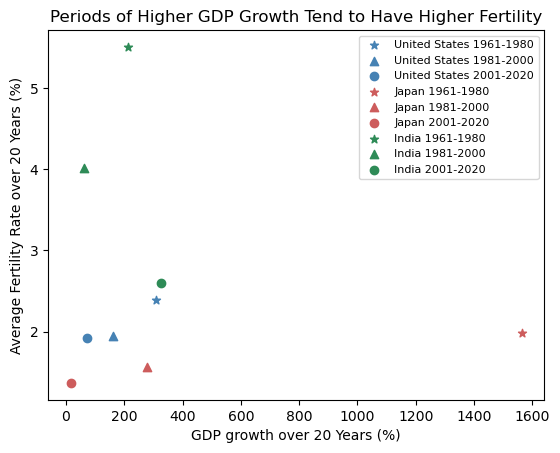

In [169]:
# Scatter Plot of GDP Growth vs Average Fertility Rate 
# ["lightblue", "steelblue", "darkblue"]
us_plt_1 = plt.scatter(x = analysis.loc[:, "US GDP growth (%)"][0], y = analysis.loc[:, "US Average Fertility Rate" ][0], c= "steelblue", marker = "*")
us_plt_2 = plt.scatter(x = analysis.loc[:, "US GDP growth (%)"][1], y = analysis.loc[:, "US Average Fertility Rate" ][1], c= "steelblue", marker = "^")
us_plt_3 = plt.scatter(x = analysis.loc[:, "US GDP growth (%)"][2], y = analysis.loc[:, "US Average Fertility Rate" ][2], c= "steelblue", marker = "o")

jpn_plt_1 = plt.scatter(x = analysis.loc[:, "Japan GDP growth (%)"][0], y = analysis.loc[:, "Japan Average Fertility Rate" ][0], c= "indianred", marker = "*")
jpn_plt_2 = plt.scatter(x = analysis.loc[:, "Japan GDP growth (%)"][1], y = analysis.loc[:, "Japan Average Fertility Rate" ][1], c= "indianred", marker = "^")
jpn_plt_3 = plt.scatter(x = analysis.loc[:, "Japan GDP growth (%)"][2], y = analysis.loc[:, "Japan Average Fertility Rate" ][2], c= "indianred", marker = "o")

ind_plt_1 = plt.scatter(x = analysis.loc[:, "India GDP growth (%)"][0], y = analysis.loc[:, "India Average Fertility Rate" ][0], c= "seagreen", marker = "*")
ind_plt_2 = plt.scatter(x = analysis.loc[:, "India GDP growth (%)"][1], y = analysis.loc[:, "India Average Fertility Rate" ][1], c= "seagreen", marker = "^")
ind_plt_3 = plt.scatter(x = analysis.loc[:, "India GDP growth (%)"][2], y = analysis.loc[:, "India Average Fertility Rate" ][2], c= "seagreen", marker = "o")

plt.legend((us_plt_1, us_plt_2, us_plt_3, jpn_plt_1, jpn_plt_2, jpn_plt_3, ind_plt_1, ind_plt_2, ind_plt_3),
           ('United States 1961-1980','United States 1981-2000', 'United States 2001-2020','Japan 1961-1980','Japan 1981-2000', 'Japan 2001-2020','India 1961-1980','India 1981-2000', 'India 2001-2020'),
           scatterpoints=1,
           loc='upper right',
           fontsize=8)
plt.xlabel("GDP growth over 20 Years (%)")
plt.ylabel("Average Fertility Rate over 20 Years (%)")
plt.title("Periods of Higher GDP Growth Tend to Have Higher Fertility")

Text(0, 0.5, 'Male Mortality, Deaths per 10,000')

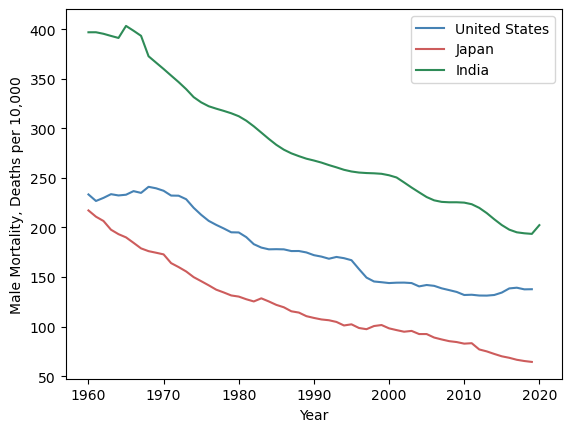

In [170]:
us["Male Mortality"].plot(c="steelblue")
jpn["Male Mortality"].plot(c="indianred")
ind["Male Mortality"].plot(c="seagreen")
plt.legend(('United States', 'Japan', 'India'),
           scatterpoints=1,
           loc='upper right',
           fontsize=10)
plt.xlabel("Year")
plt.ylabel("Male Mortality, Deaths per 10,000")

#jpn["Total Fertility Rate"].plot()
#ind["Total Fertility Rate"].plot()

# indicators = {"NY.GDP.PCAP.CD":"GDP per capita",
#               "SP.DYN.TFRT.IN":"Total Fertility Rate",
#               "SP.POP.GROW":"Population Growth Rate",
#               "SP.DYN.AMRT.MA":"Male Mortality",
#               "SP.DYN.AMRT.FE":"Female Mortality",
#               "SP.POP.1564.FE.ZS":"% Adult Female",
#               "SP.POP.TOTL.FE.ZS":"% Female", 
#               "SP.POP.TOTL" : "Total Population"}

Text(0, 0.5, 'Female Mortality, Deaths per 10,000')

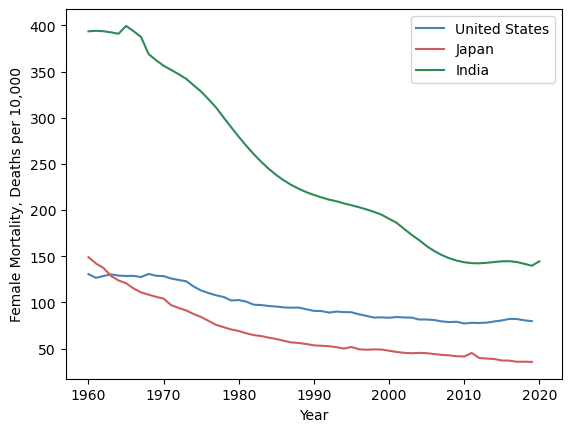

In [171]:
us["Female Mortality"].plot(c="steelblue")
jpn["Female Mortality"].plot(c="indianred")
ind["Female Mortality"].plot(c="seagreen")
plt.legend(('United States', 'Japan', 'India'),
           scatterpoints=1,
           loc='upper right',
           fontsize=10)
plt.xlabel("Year")
plt.ylabel("Female Mortality, Deaths per 10,000")

Text(0, 0.5, 'Net Migration (total # of people)')

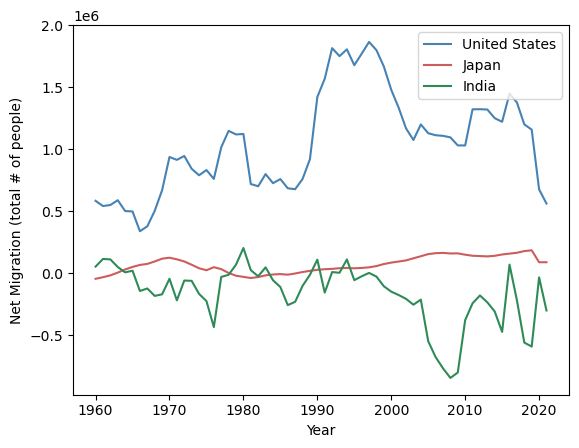

In [172]:
us["Net migration"].plot(c="steelblue")
jpn["Net migration"].plot(c="indianred")
ind["Net migration"].plot(c="seagreen")
plt.legend(('United States', 'Japan', 'India'),
           scatterpoints=1,
           loc='upper right',
           fontsize=10)
plt.xlabel("Year")
plt.ylabel("Net Migration (total # of people)")

Text(0, 0.5, 'Urban Population (% of total)')

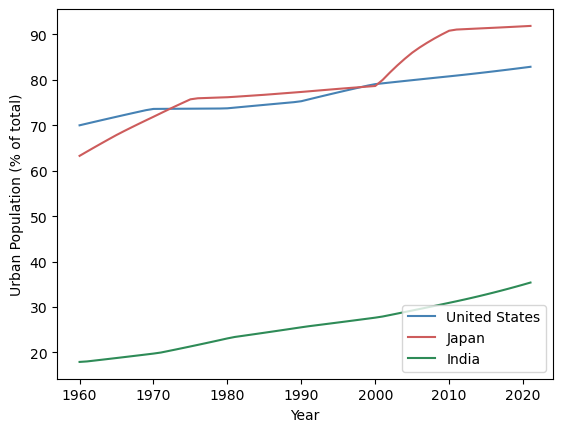

In [173]:
us["Urban Population (% of total)"].plot(c="steelblue")
jpn["Urban Population (% of total)"].plot(c="indianred")
ind["Urban Population (% of total)"].plot(c="seagreen")
plt.legend(('United States', 'Japan', 'India'),
           scatterpoints=1,
           loc='lower right',
           fontsize=10)
plt.xlabel("Year")
plt.ylabel("Urban Population (% of total)")

In [174]:
## 
import plotly.offline as py
import plotly.graph_objs as go
age_ranges = []


py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

def fun(country):
    df = wbdata.get_dataframe(variables,country=country)
    #print(df.query("date=='2020'").sum(axis=0))
    years = range(2020,1960,-20)

    # This makes a list of graphs, year by year
    bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
                   y = [int(s[:2])+1 for s in age_ranges],
                   orientation='h',
                   name='Men {:d}'.format(year),
                   hoverinfo='skip'
                  )
            for year in years]
          
    bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                    y=[int(s[:2])+1 for s in age_ranges],
                    orientation='h',
                    name='Women {:d}'.format(year),
                    hoverinfo='skip',
               )
             for year in years]
    return py.iplot(dict(data=bins, layout=layout))

fun("USA")

In [175]:
fun("JPN")

In [176]:
fun("IND")

<AxesSubplot:>

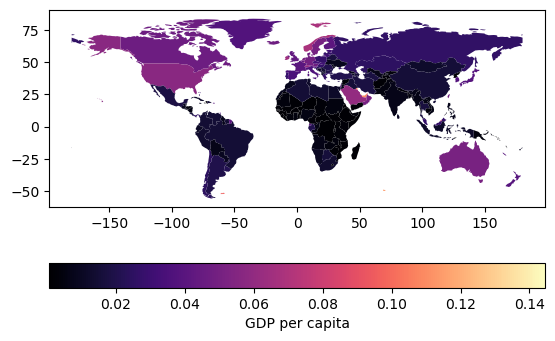

In [177]:
!pip install geopandas
import pandas
import geopandas
df = pandas.read_csv("https://raw.githubusercontent.com/danhammer/envirods/main/data/farmers-mkts.csv")
gdf = geopandas.GeoDataFrame(df,geometry=geopandas.points_from_xy(df.x, df.y))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world2 = world.drop(columns=['iso_a3', 'gdp_md_est', 'geometry', 'name'])
population = world2.groupby('continent').sum()
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

fix, ax = plt.subplots(1,1)

world.plot(
    column='gdp_per_cap',
    ax=ax,
    legend=True,
    legend_kwds={'label': "GDP per capita",
                 'orientation': "horizontal"},
    figsize=(30,20),
    cmap='magma')